#**Exploratory Data Analysis for Telecom Customer Churn**
####**By-Veer Singh**

#**Importing all the Important Libraries for Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing Dataset**

In [ ]:
data=pd.read_csv('Customer Churn.csv')

#**Understanding the Data**

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Insights:**
*   The 'TotalCharges' column is incorrectly assigned as an object data type, but it should be a float. This error occurs due to the presence of blank values.
*   Upon further investigation, the issue stems from Python's misinterpretation of blank values. These blanks appear when the 'Tenure' value is zero, as 'TotalCharges' is a product of 'Tenure' and 'MonthlyCharges'.
*   The zero 'Tenure' values likely represent new customers who have recently joined the telecom service, leading to blank 'TotalCharges'.

#**Changing Datatype for 'TotalCharges' to float.**

In [ ]:
data["TotalCharges"]=data["TotalCharges"].replace(" ","0")
data["TotalCharges"]=data["TotalCharges"].astype("float")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#**Checking Null Values**

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There are no Null values.

#**Descriptive Statistics**

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#**Transforming the values in column 'SeniorCitizen' into Yes/No**

In [ ]:
def convert(value):
  if value==1:
    return "Yes"
  else:
    return "No"
data["SeniorCitizen"]=data["SeniorCitizen"].apply(convert)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


#**Number of Customers Churned**

<ipython-input-13-e115b69b15c5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar=sns.countplot(x=data["Churn"],palette=['skyblue','darkblue'])


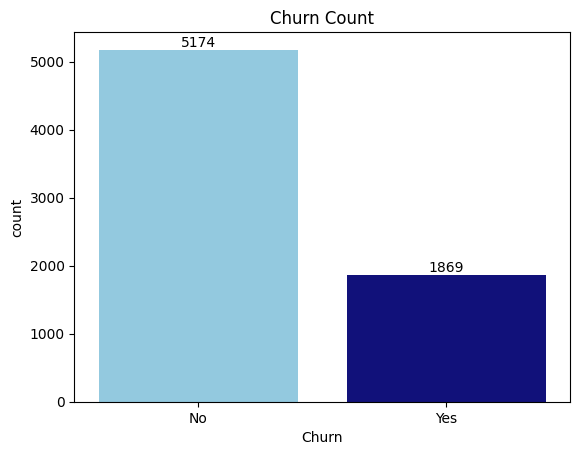

In [ ]:
bar=sns.countplot(x=data["Churn"],palette=['skyblue','darkblue'])
bar.bar_label(bar.containers[0])
bar.bar_label(bar.containers[1])
plt.title("Churn Count")
plt.show()

**This bar chart depicts both the count of customers who have churned out and the retained ones.**

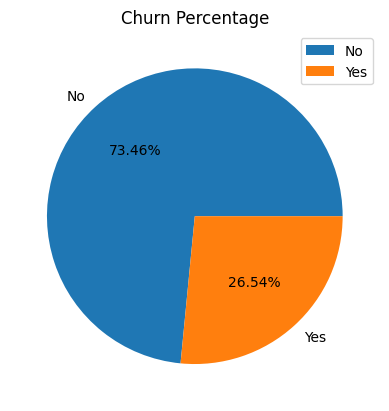

In [ ]:
plt.pie(x=data["Churn"].value_counts(),labels=data["Churn"].value_counts().index,autopct="%1.2f%%")
plt.legend()
plt.title("Churn Percentage")
plt.show()

**We can clearly observe that about 26% of the customers have churned out.**

**Now Lets explore the possible reasons for this.**

#**Impact of Gender on Churn Rate**

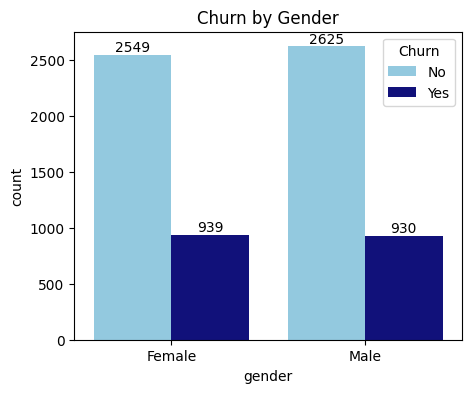

In [ ]:
plt.figure(figsize=(5,4))
g=sns.countplot(x=data["gender"],hue=data["Churn"],palette=['skyblue','darkblue'])
g.bar_label(g.containers[0])
g.bar_label(g.containers[1])
plt.title("Churn by Gender")
plt.show()

**Insights**
*   No significant difference in churn rate based on gender: Both males and females exhibit similar churn rates.



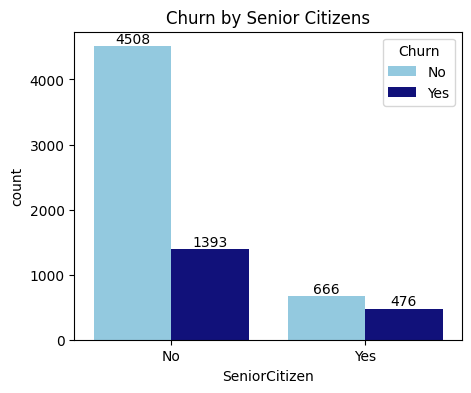

In [ ]:
plt.figure(figsize=(5,4))
g=sns.countplot(x=data["SeniorCitizen"],hue=data["Churn"],palette=['skyblue','darkblue'])
g.bar_label(g.containers[0])
g.bar_label(g.containers[1])
plt.title("Churn by Senior Citizens")
plt.show()


**Even though the senior citizens are less in number than other citizens, it looks like a more percentage of them are churning out. In order to confirm this fact stacked bar chart with percentage labels would be plotted.**

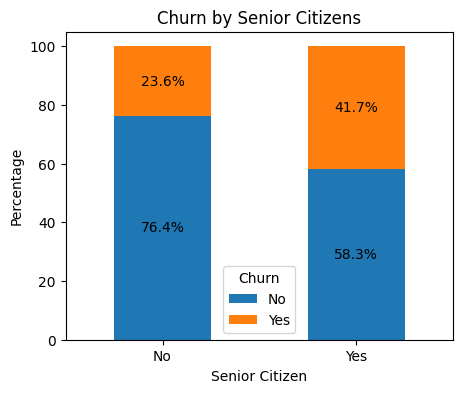

In [ ]:
counts = data.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(5, 4))

bars = percentages.plot(kind='bar', stacked=True, ax=plt.gca())

for i in range(len(bars.containers[0])):
    height1 = bars.containers[0][i].get_height()
    height2 = bars.containers[1][i].get_height()

    bars.annotate(f'{height1:.1f}%',
                  (bars.containers[0][i].get_x() + bars.containers[0][i].get_width() / 2,
                   height1 / 2), ha='center', va='center')

    bars.annotate(f'{height2:.1f}%',
                  (bars.containers[1][i].get_x() + bars.containers[1][i].get_width() / 2,
                   height1 + height2 / 2), ha='center', va='center')

plt.title("Churn by Senior Citizens")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

**Insights:**
*   Higher churn rate among senior citizens: Senior citizens are more likely to churn compared to younger customers.
*   Non-senior citizens have a much lower churn rate: A significantly higher percentage of non-senior citizens remain with the company (76.4%) compared to senior citizens (58.3%).



#**Impact of Customer Tenure on Churn and Usage Patterns**

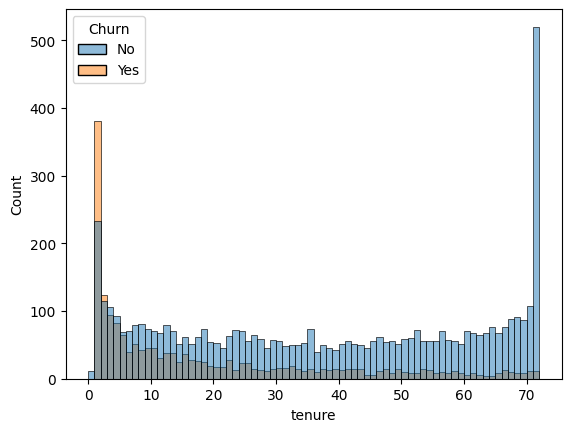

In [ ]:
sns.histplot(x=data["tenure"],bins=72,hue=data["Churn"])
plt.show()

**Insights:**
*   Higher churn rates among newer customers: Customers with lower tenure (i.e., those who have been with the company for a shorter duration) are more likely to churn.
*   Decreasing churn rates with increasing tenure: As customers stay with the company longer, their likelihood of churning decreases.
*   Significant difference in churn rates for early tenure: The difference in churn rates between customers with and without churn is most pronounced during the initial tenure period.






#**Impact of Customer Contract on Churn Rate**

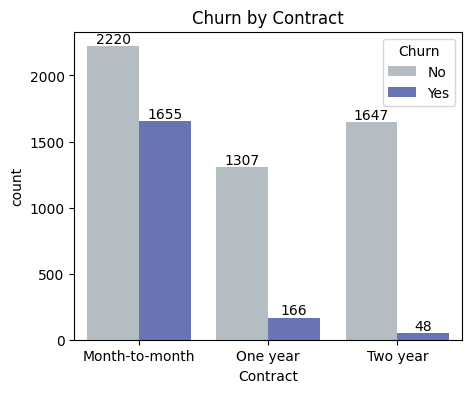

In [ ]:
plt.figure(figsize=(5,4))
g=sns.countplot(x=data["Contract"],hue=data["Churn"],palette=['#b0bec5','#5c6bc0'])
g.bar_label(g.containers[0])
g.bar_label(g.containers[1])
plt.title("Churn by Contract")
plt.show()

**Insights:**

*   Customers having month-to-month billing contract are more likely to churn out in comparison to one year and two year contract
*   This helped us in identifying that we need to work on convincing the customer for opting with long term contract in order to reduce the churn rate.
*   Long term contracts should include more incentives in order to attract the customers.




#**Churn Counts Across Various Services**

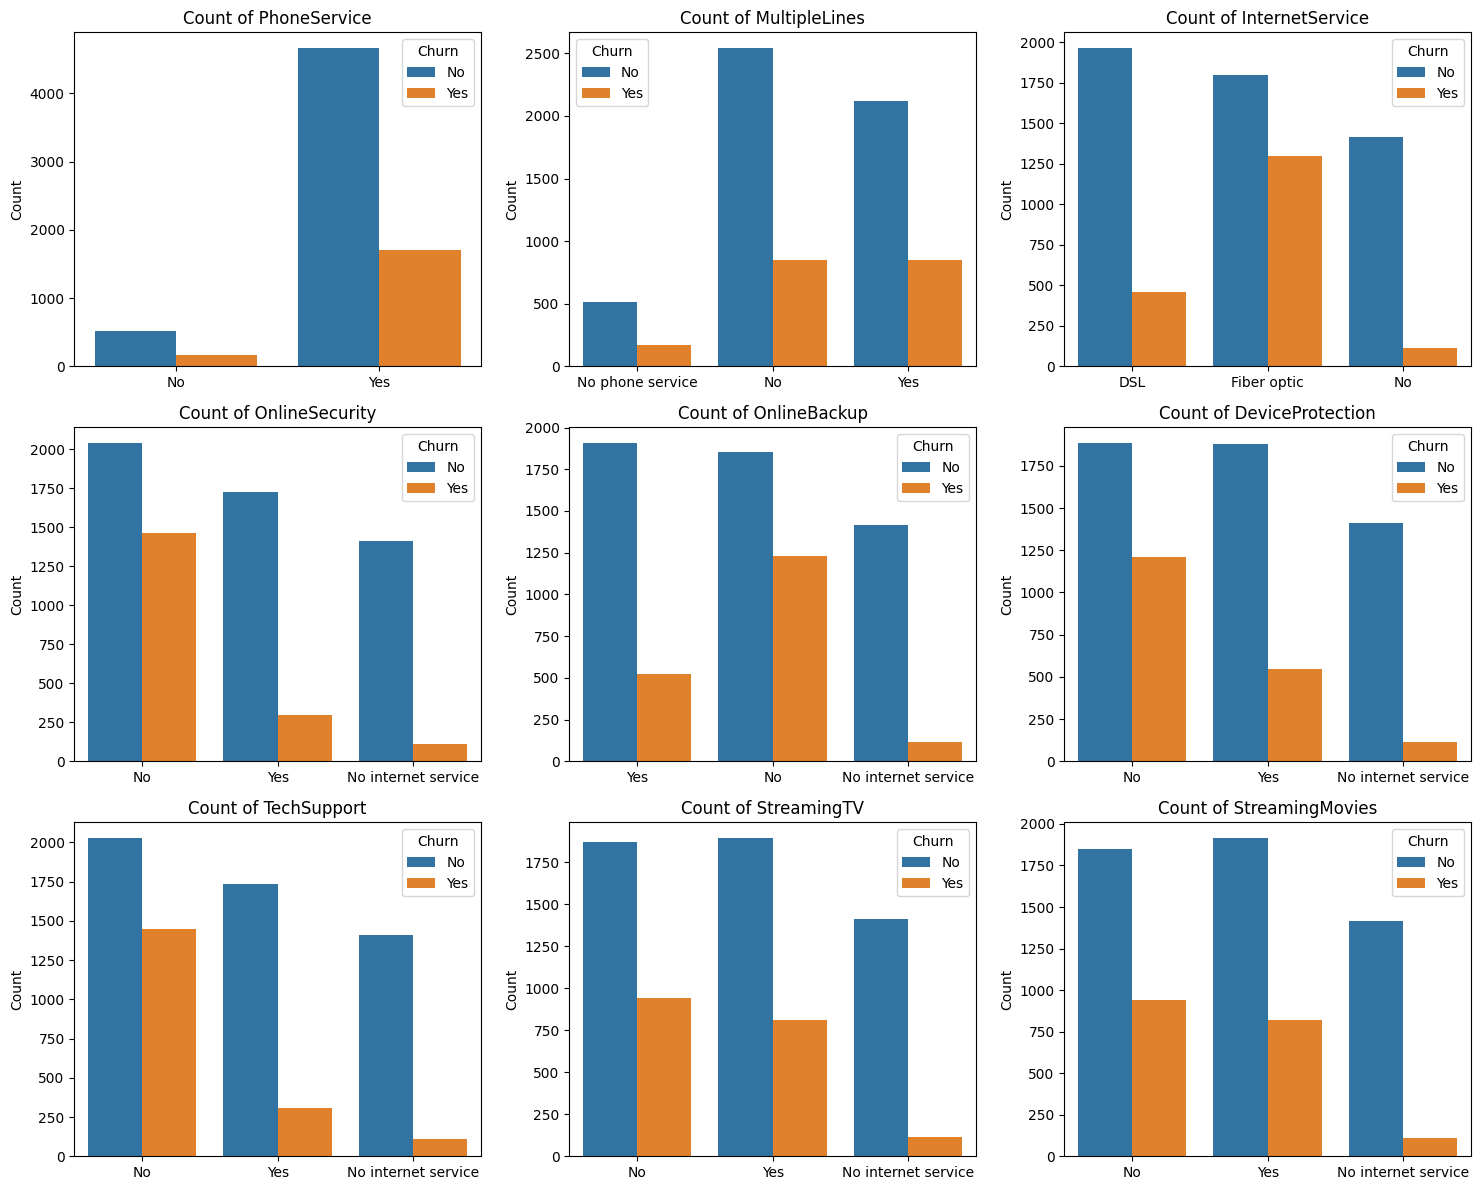

In [ ]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']
n_rows = 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=data[col], ax=axes[i], hue=data["Churn"])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Insights:**
*   Additional services like online security, backup, device protection, and tech support correlate with lower churn rates. Customers who lack these services churn significantly more.
*   Fiber optic internet users exhibit a higher churn rate compared to DSL users, indicating possible dissatisfaction or competitive pressure in this service category.
*   Customers without multiple lines, streaming TV, or streaming movies tend to churn more frequently, suggesting that bundling more services could help reduce churn.
*   Phone service has a high churn rate overall, but customers without this service churn at a significantly lower rate.





#**Impact of Payment Method on Churn Rate**

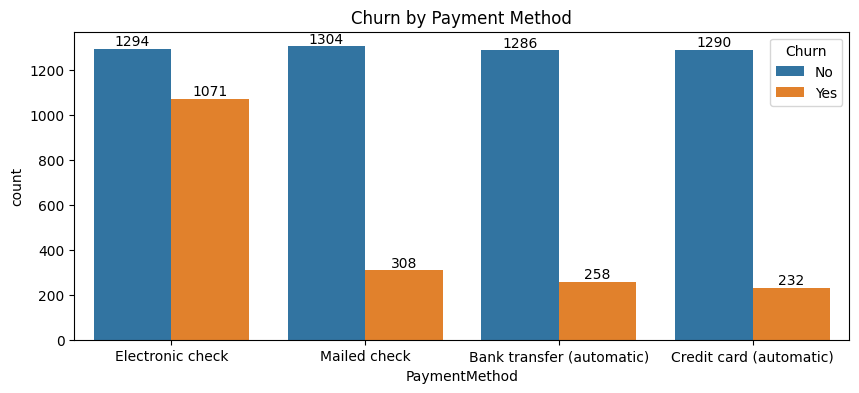

In [ ]:
plt.figure(figsize=(10,4))
b=sns.countplot(x=data["PaymentMethod"],hue=data["Churn"])
b.bar_label(b.containers[0])
b.bar_label(b.containers[1])
plt.title("Churn by Payment Method")
plt.show()

**Insights:**
*   Electronic check has the highest churn rate. A significant portion of customers using electronic check have churned.
*   Credit card (automatic) has the lowest churn rate. This payment method seems to be the most reliable and has the least customer attrition.



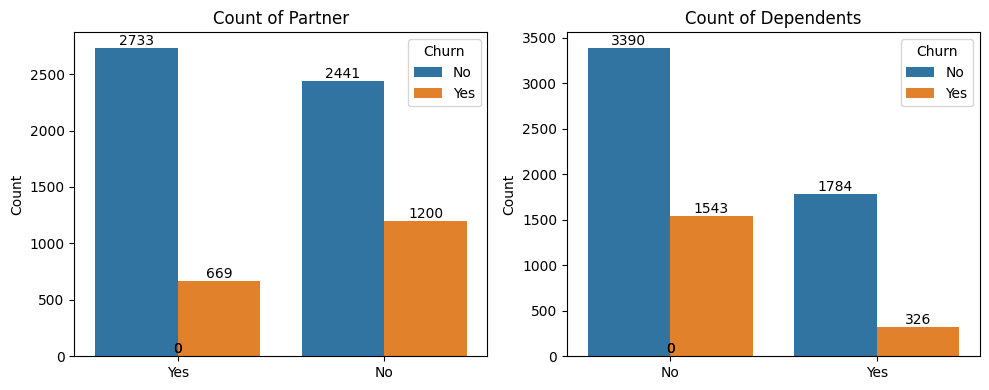

In [ ]:
columns = ['Partner', 'Dependents']
n_rows = 1
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=data[col], ax=axes[i], hue=data["Churn"])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom')
plt.tight_layout()
plt.show()

**Insights**
*   Partner status is a stronger predictor of churn than dependents.
*   Customers with partners have lower churn rates.
*   The presence or absence of dependents does not significantly impact churn.



